# Hypothesis: I believe seniors are more likely to complete lessons during the registered course time than first years.

In [ ]:
__author__ = "730318766"

## 1st I will read in the csv and convert it into a column-oriented data table.

In [2]:
%reload_ext autoreload
%autoreload 2

In [4]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows("../../data/survey.csv")
columns: dict[str, list[str]] = columnar(data_rows)

## Next, I will select the year column and show the first 5 rows of data.

In [12]:
from data_utils import select, head

subset: dict[str, list[str]] = select(columns, ["year"])
head(subset, 5)

{'year': ['21', '23', '23', '23', '24']}

## Next, I will filter the column data to include only data that corresponds to Seniors and First-Years.

In [89]:
def mask(col: list[str], threshold: int) -> list[bool]:
    filtered: list[bool] = []
    for value in col:
        filtered.append(int(value) == threshold)
    return filtered

s_subset: list[bool] = mask(subset["year"], 21)
f_subset: list[bool] = mask(subset["year"], 24)

## Then I'll create lists of the frequencies at which seniors and first-years complete each lecture's lessons during the hours of the day registered for the course.

In [29]:
def masked(col: list[str], mask: list[bool]) -> list[str]:
    result: list[str] = []
    for i in range(len(mask)):
        if mask[i]:
            result.append(col[i])
    return result

s_complete_lesson: list[str] = masked(columns["lesson_time"], s_subset)
f_complete_lesson: list[str] = masked(columns["lesson_time"], f_subset)

## Now I will count up how many times Seniors and First-Years selected each frequency of completing a lesson during lecture time. 

In [31]:
from data_utils import count

s_counts: dict[str, int] = count(s_complete_lesson)
f_counts: dict[str, int] = count(f_complete_lesson)

print(f"Senior Counts: {s_counts}")
print(f"First-Year Counts: {f_counts}")

Senior Counts: {'1': 9, '6': 15, '7': 5, '4': 4, '5': 8, '2': 4, '3': 1}
First-Year Counts: {'4': 21, '6': 57, '7': 46, '5': 47, '1': 18, '3': 22, '2': 18}


## Next, I will produce a bar graph of the individual frequencies for the ratings.

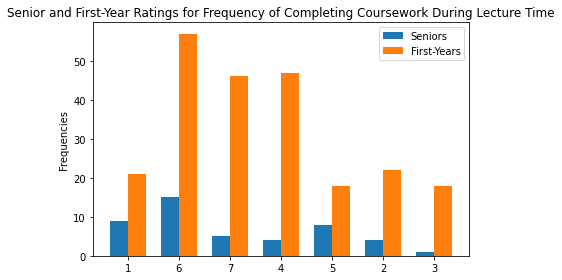

In [58]:
from matplotlib import pyplot as plt
from matplotlib import numpy as np

fig, ax = plt.subplots()

x = np.arange(len(s_counts))

a = ax.bar(x - 0.35/2, s_counts.values(), 0.35, label='Seniors')
b = ax.bar(x + 0.35/2, f_counts.values(), 0.35, label='First-Years')

ax.set_ylabel('Frequencies')
ax.set_title('Senior and First-Year Ratings for Frequency of Completing Coursework During Lecture Time')
ax.set_xticks(x)
ax.set_xticklabels(s_counts.keys())
ax.legend()

fig.tight_layout()

plt.show()

## Then, I'll compute the average frequencies.

In [39]:
def average(counts: dict[str, int]) -> float:
    multiplied: list[int] = []
    total: list[int] = []
    for key in counts:
        multiplied.append(int(key) * counts[key])
        total.append(counts[key])
    return sum(multiplied) / sum(total)

s_average: float = average(s_counts)
f_average: float = average(f_counts)

print(f"Seniors, on average, rated themselves a {s_average} on how frequently they complete their lessons during their registered lecture time. First-Years, on the other hand, rated themselves a {f_average}, on average.(Scale: 1-7 with 1 being Never and 7 being Always)")

Seniors, on average, rated themselves a 4.369565217391305 on how frequently they complete their lessons during their registered lecture time. First-Years, on the other hand, rated themselves a 4.816593886462882, on average.(Scale: 1-7 with 1 being Never and 7 being Always)


## Conclusion
### In conclusion, Senior and First-Years are about equally likely to complete their lessons during their registered course times which disproves my hypothesis. There is only a slight difference between their average frequency ratings which are both in the 4-5 range. This could be because many chose a median rating due to guessing/estimating or it could possibly mean that regardless of how long spent in college, students generally complete lessons within lecture times about 50% of the time.